# APOKASC sample



In [2]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
rootpath='/Users/yaguang/Dropbox (Sydney Uni)/Work/nike/'

In [11]:
yu=ascii.read(rootpath+"sample/yu18_HeB.csv")
apk=ascii.read(rootpath+"sample/apk18_HeB.csv")

In [26]:
# key = "numax" # "numax"
# plt.plot(apk["fmax"], apk[key], "k.")
# plt.xscale("log")
# plt.yscale("log")
# plt.show()
# plt.plot(apk["fmax"], (apk["fmax"]-apk[key])/apk["fmax"]*100, "k.")
# plt.xscale("log")
# plt.show()
# plt.hist((apk["fmax"]-apk[key])/apk["fmax"]*100, bins=np.arange(-20,20,1))
# plt.show()

# print(np.std(apk["fmax"]-apk[key]))
# bins = np.arange(0., 2.0, 0.02)
# plt.hist(apk["e_fmax"], histtype="step", label="e_fmax", bins=bins)
# plt.hist(apk["e_"+key], histtype="step", label="e_"+key, bins=bins)
# plt.legend()
# plt.show()

In [5]:
# plt.plot(apk["dnu_2"], apk["Delnu"], "k.")
# plt.xscale("log")
# plt.yscale("log")
# plt.show()

# # idx = ((apk["dnu_2"]-apk["Delnu"])/apk["dnu_2"]*100 > 9) & ((apk["dnu_2"]-apk["Delnu"])/apk["dnu_2"]*100 <11)
# # kic = apk["KIC"][idx]
# # print(kic)
# # plt.plot(apk["dnu_2"], (apk["dnu_2"]-apk["Delnu"])/apk["dnu_2"]*100, "k.")
# # plt.plot(apk["dnu_2"][idx], (apk["dnu_2"][idx]-apk["Delnu"][idx])/apk["dnu_2"][idx]*100, "r.")
# # plt.xscale("log")
# # plt.show()

# plt.hist((apk["dnu_2"]-apk["Delnu"])/apk["dnu_2"]*100, bins=np.arange(-20,20,1))
# plt.show()


# print(np.std(apk["dnu_2"]-apk["Delnu"]))
# print(np.mean(apk["e_dnu_2"]))
# print(np.mean(apk["e_Delnu"]))

In [6]:
# plt.plot(apk["ClcorM"], apk["M(cor)"], "k.")
# plt.show()

# bins = np.arange(4000, 6000, 50)
# plt.hist(apk["Teff_1"], bins=bins, histtype="step")
# plt.hist(apk["Teff_2"], bins=bins, histtype="step")
# plt.show()

# bins = np.arange(50, 120, 2)
# plt.hist(apk["e_Teff_1"], bins=bins, histtype="step")
# plt.hist(apk["e_Teff_2"], bins=bins, histtype="step")
# plt.show()

# plt.plot(apk["ClcorR"], apk["R(cor)"], "k.")
# plt.show()

# on the dnu-numax diagram, who has the sharpest edge?

ok, kallinger has the sharpest edge, but some of his measurements for low-mass stars do not look correct.

I don't have the obligation to correct kallinger's result... so I'll stick to Yu+18 for now.

But it doesn't seem a very serious problem... given the number of stars affected is small. Please reconsider

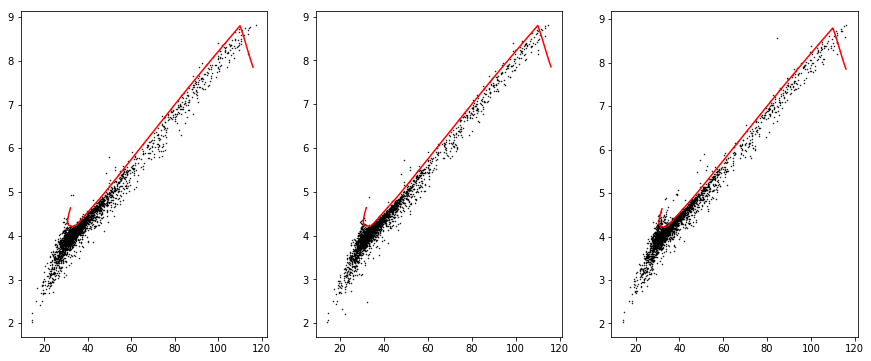

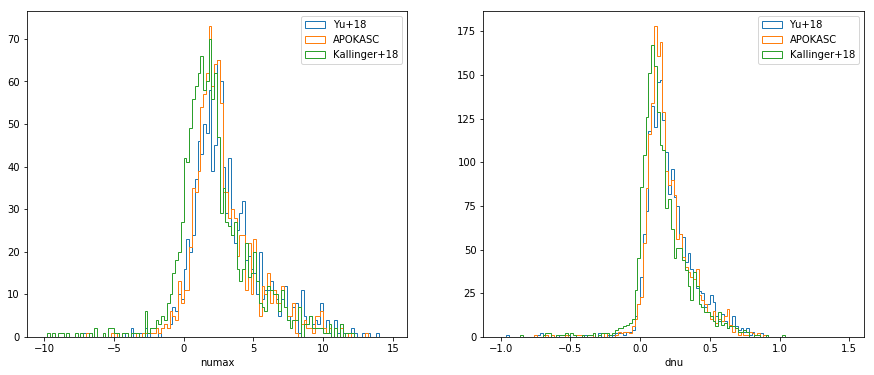

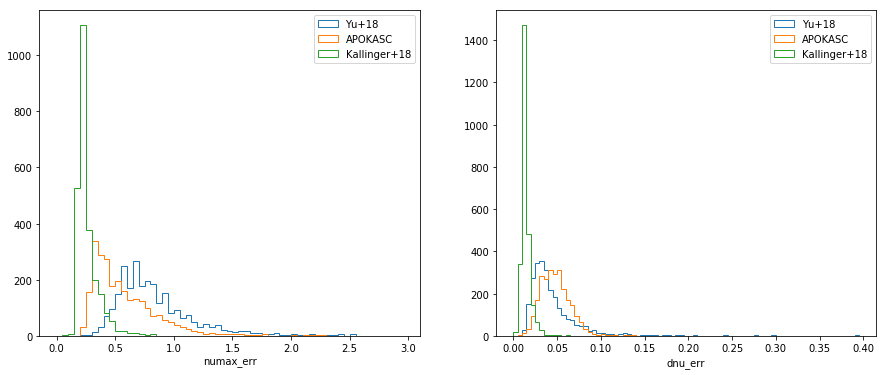

In [18]:
edges = np.load(rootpath+"sample/obs/tnu_edge_samples.npy")
tcks, tp = np.load(rootpath+"sample/obs/nike_spline_tck.npy", allow_pickle=True)
import sys
sys.path.append(rootpath)
from lib.histdist import distance_to_edge


fig0, axes0 = plt.subplots(nrows=1,ncols=3,figsize=(15,6))
fig1, axes1 = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
fig2, axes2 = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
def myplot(i, numax, dnu, numax_err, dnu_err, label):

#     axes[0].plot(numax,dnu,"k.")    
#     axes[0].plot(edges[:,0], edges[:,1], "r")
    axes0[i].plot(numax,dnu,"k.", ms=1)   
    axes0[i].plot(edges[:,0], edges[:,1], "r")
    dy, _, _ = distance_to_edge(numax, dnu, edges[:,0], edges[:,1], tcks, tp, diagram="tnu", distance="vertical")
    dx, _, _ = distance_to_edge(numax, dnu, edges[:,0], edges[:,1], tcks, tp, diagram="tnu", distance="horizontal")
    bins1, bins2 = np.arange(-10, 15, 0.2), np.arange(-1.0, 1.5, 0.02)
    axes1[0].hist(dx, bins=bins1, histtype="step", label=label)
    axes1[0].set_xlabel("numax")
    axes1[1].hist(dy, bins=bins2, histtype="step", label=label)
    axes1[1].set_xlabel("dnu")
    
    bins1, bins2 = np.arange(0., 3, 0.05), np.arange(0., 0.4, 0.005)
    axes2[0].hist(numax_err, bins=bins1, histtype="step", label=label)
    axes2[0].set_xlabel("numax_err")
    axes2[1].hist(dnu_err, bins=bins2, histtype="step", label=label)
    axes2[1].set_xlabel("dnu_err")
    return

myplot(0, apk["numax"], apk["Delnu"], apk["e_numax"], apk["e_Delnu"], "Yu+18")
myplot(1, apk["Nmax"], apk["Dnu_1"], apk["e_Nmax"]*apk["Nmax"], apk["e_Dnu_1"]*apk["Dnu_1"], "APOKASC")
myplot(2, apk["fmax"], apk["dnu_2"], apk["e_fmax"], apk["e_dnu_2"], "Kallinger+18")

axes1[0].legend()
axes1[1].legend()
axes2[0].legend()
axes2[1].legend()
plt.show()


# If I use apokasc temperature, will Jie's measurements of mass and radius improve?

Well, I don't think there is a huge difference.

/Users/yaguang/Dropbox (Sydney Uni)/Work/nike/fdnu/asfgrid.py:202: RuntimeWarning: divide by zero encountered in log10
  return np.log10((numax/self.numax_solar)*np.sqrt(teff/self.teff_solar))+self.logg_solar
/Users/yaguang/Dropbox (Sydney Uni)/Work/nike/fdnu/asfgrid.py:257: RuntimeWarning: divide by zero encountered in log10
  return np.log10(teff)+0.5*(np.tanh((logg-4.5)/0.25)+1)*logg*0.1
/Users/yaguang/Dropbox (Sydney Uni)/Work/nike/fdnu/asfgrid.py:257: RuntimeWarning: invalid value encountered in multiply
  return np.log10(teff)+0.5*(np.tanh((logg-4.5)/0.25)+1)*logg*0.1
/Users/yaguang/anaconda/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:2539: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
/Users/yaguang/anaconda/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:2540: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]
/Users/yaguang/Dropbox (Sydney Uni)/Work/nike/lib/histdist.py:205: Runt

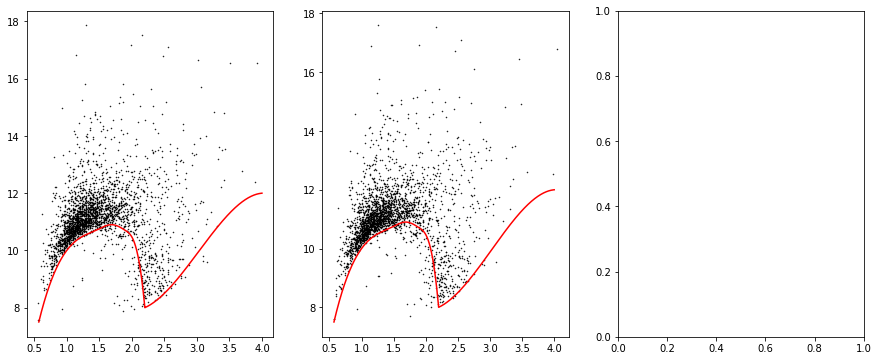

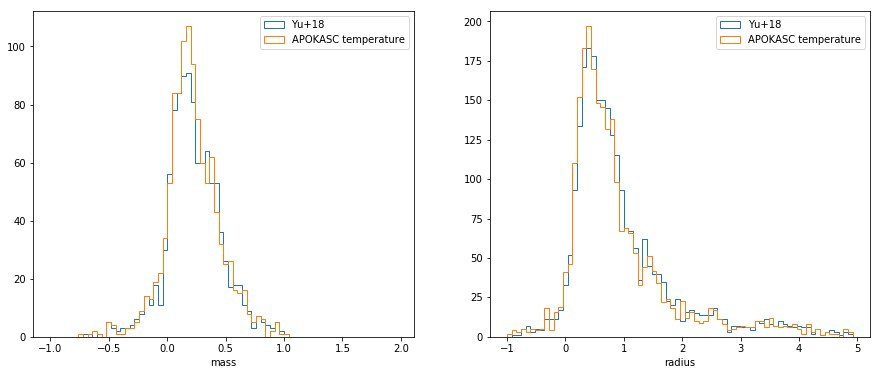

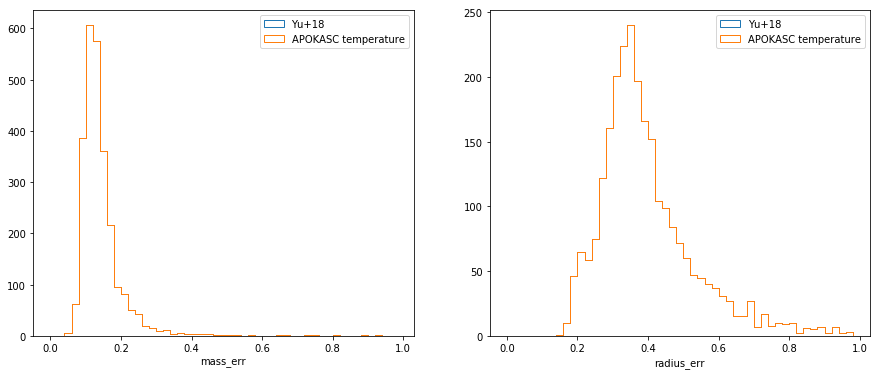

In [72]:
edges = np.load(rootpath+"sample/obs/mr_edge_samples.npy")
tcks, tp = np.load(rootpath+"sample/obs/mr_spline_tck.npy", allow_pickle=True)
import sys
sys.path.append(rootpath)
from lib.histdist import distance_to_edge


fig0, axes0 = plt.subplots(nrows=1,ncols=3,figsize=(15,6))
fig1, axes1 = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
fig2, axes2 = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
def myplot(i, mass, radius, mass_err, radius_err, label):

#     axes[0].plot(numax,dnu,"k.")    
#     axes[0].plot(edges[:,0], edges[:,1], "r")
    axes0[i].plot(mass,radius,"k.", ms=1)   
    axes0[i].plot(edges[:,0], edges[:,1], "r")
    dy, _, _ = distance_to_edge(mass, radius, edges[:,0], edges[:,1], tcks, tp, diagram="mr", distance="vertical")
    dx, _, _ = distance_to_edge(mass, radius, edges[:,0], edges[:,1], tcks, tp, diagram="mr", distance="horizontal")
    bins1, bins2 = np.arange(-1, 2, 0.04), np.arange(-1.0, 5, 0.08)
    axes1[0].hist(dx, bins=bins1, histtype="step", label=label)
    axes1[0].set_xlabel("mass")
    axes1[1].hist(dy, bins=bins2, histtype="step", label=label)
    axes1[1].set_xlabel("radius")
    
    bins1, bins2 = np.arange(0., 1, 0.02), np.arange(0, 1, 0.02)
    axes2[0].hist(mass_err, bins=bins1, histtype="step", label=label)
    axes2[0].set_xlabel("mass_err")
    axes2[1].hist(radius_err, bins=bins2, histtype="step", label=label)
    axes2[1].set_xlabel("radius_err")
    return

myplot(0, apk["ClcorM"], apk["ClcorR"], apk["e_ClcorM"], apk["e_ClcorR"], "Yu+18")

from fdnu import asfgrid
s=asfgrid.Seism(datadir=rootpath+"fdnu/")
fnumax = 1
mh = apk["FeH"] + np.log10(10.0**apk["AFe"]*0.694 + 0.306)
evstate = np.zeros(len(mh))+2
km, kr = s.get_mass_radius(evstate, mh, apk["Teff_2"], apk["Delnu"], apk["numax"], fill_value=None, isfeh=True)
# km = (apk["numax"]/3090/fnumax)**3. * (apk ["Teff_2"]/5777/fdnu)**1.5 * (apk["Delnu"]/135.1)**-4.
# kr = (apk["numax"]/3090/fnumax)**1. * (apk["Teff_2"]/5777/fdnu)**0.5 * (apk["Delnu"]/135.1)**-2.
myplot(1, km, kr, apk["e_ClcorM"], apk["e_ClcorR"], "APOKASC temperature")

axes1[0].legend()
axes1[1].legend()
axes2[0].legend()
axes2[1].legend()
plt.show()


# How did Jie calculate the errors of mass and radius?

ALthough I can not 100% reproduce their errors, using propagation equations serve a good approximation.

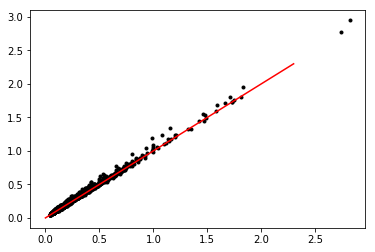

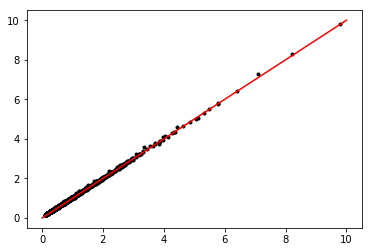

In [90]:
# km, kr = s.get_mass_radius(evstate, mh, apk["Teff_1"], apk["Delnu"], apk["numax"], fill_value=None, isfeh=True)

numax, dnu, teff = yu["numax"], yu["Delnu"], yu["Teff"]
enumax, ednu, eteff = yu["e_numax"], yu["e_Delnu"], yu["e_Teff"]
numax_solar, dnu_solar, teff_solar = 3090, 135.1, 5777

def get_emass_eradius(numax, dnu, teff, enumax, ednu, eteff, numax_solar, dnu_solar, teff_solar):
    emass = ((3*(numax/numax_solar)**2. * (dnu/dnu_solar)**-4 * (teff/teff_solar)**1.5)**2. * (enumax/numax_solar)**2.
    + ((numax/numax_solar)**3. * (-4)*(dnu/dnu_solar)**-5 * (teff/teff_solar)**1.5)**2. * (ednu/dnu_solar)**2.0
    + ((numax/numax_solar)**3. * (dnu/dnu_solar)**-4 * 1.5*(teff/teff_solar)**0.5)**2. * (eteff/teff_solar)**2.0 )**0.5
    eradius = (( (dnu/dnu_solar)**-2 * (teff/teff_solar)**0.5 )**2. * (enumax/numax_solar)**2.
    + ((numax/numax_solar)**1. * (-2)*(dnu/dnu_solar)**-3 * (teff/teff_solar)**0.5)**2. * (ednu/dnu_solar)**2.0
    + ((numax/numax_solar)**1. * (dnu/dnu_solar)**-2 * 0.5*(teff/teff_solar)**-0.5)**2. * (eteff/teff_solar)**2.0 )**0.5
    return emass, eradius

emass, eradius = get_emass_eradius(numax, dnu, teff, enumax, ednu, eteff, numax_solar, dnu_solar, teff_solar)
plt.plot(emass, yu["e_ClcorM"], "k.")
plt.plot([0,2.3],[0,2.3], "r-")
plt.show()
plt.plot(eradius, yu["e_ClcorR"], "k.")
plt.plot([0,10],[0,10], "r-")
plt.show()


# compare kic25 temperature and apokasc temperature

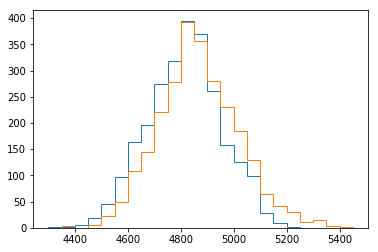

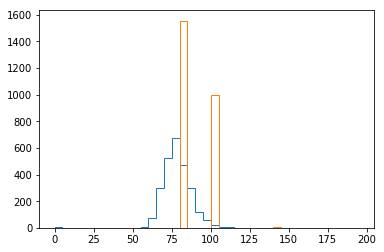

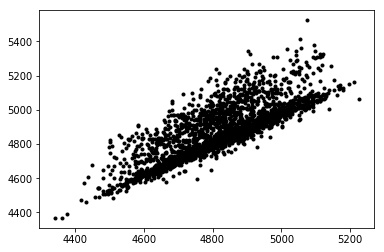

In [81]:
bins = np.arange(4300, 5500, 50)
plt.hist(apk["Teff_2"], label="apogee", histtype="step", bins=bins)
plt.hist(apk["Teff_1"], label="kic25", histtype="step", bins=bins)
plt.show()
bins = np.arange(0, 200, 5)
plt.hist(apk["e_Teff_2"], label="apogee", histtype="step", bins=bins)
plt.hist(apk["e_Teff_1"], label="kic25", histtype="step", bins=bins)
plt.show()
plt.plot(apk["Teff_2"], apk["Teff_1"], "k.")
plt.show()
# np.sum(~np.isfinite(apk["Teff_2"]))

# compare kic25 feh and apokasc feh

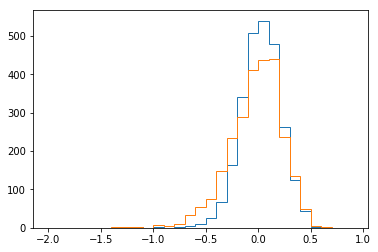

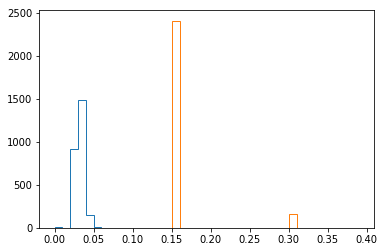

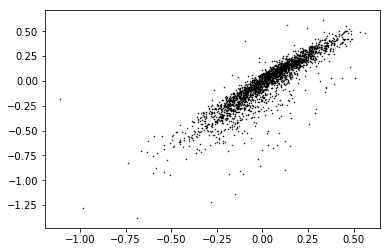

In [79]:
bins = np.arange(-2, 1, 0.1)
mh = apk["FeH"] + np.log10(10.0**apk["AFe"]*0.694 + 0.306)
plt.hist(mh, label="apogee", histtype="step", bins=bins)
plt.hist(apk["[Fe/H]"], label="kic25", histtype="step", bins=bins)
plt.show()
bins = np.arange(0, 0.4, 0.01)
plt.hist(apk["e_FeH"], label="apogee", histtype="step", bins=bins)
plt.hist(apk["e_[Fe/H]"], label="kic25", histtype="step", bins=bins)
plt.show()
plt.plot(mh, apk["[Fe/H]"], "k.", ms=1)
plt.show()
# # np.sum(~np.isfinite(apk["Teff_2"]))

51

# on the radius-mass diagram, who has the sharpest edge?

/Users/yaguang/Dropbox (Sydney Uni)/Work/nike/fdnu/asfgrid.py:202: RuntimeWarning: divide by zero encountered in log10
  return np.log10((numax/self.numax_solar)*np.sqrt(teff/self.teff_solar))+self.logg_solar
/Users/yaguang/Dropbox (Sydney Uni)/Work/nike/fdnu/asfgrid.py:257: RuntimeWarning: divide by zero encountered in log10
  return np.log10(teff)+0.5*(np.tanh((logg-4.5)/0.25)+1)*logg*0.1
/Users/yaguang/Dropbox (Sydney Uni)/Work/nike/fdnu/asfgrid.py:257: RuntimeWarning: invalid value encountered in multiply
  return np.log10(teff)+0.5*(np.tanh((logg-4.5)/0.25)+1)*logg*0.1
/Users/yaguang/anaconda/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:2539: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
/Users/yaguang/anaconda/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:2540: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]
/Users/yaguang/Dropbox (Sydney Uni)/Work/nike/lib/histdist.py:205: Runt

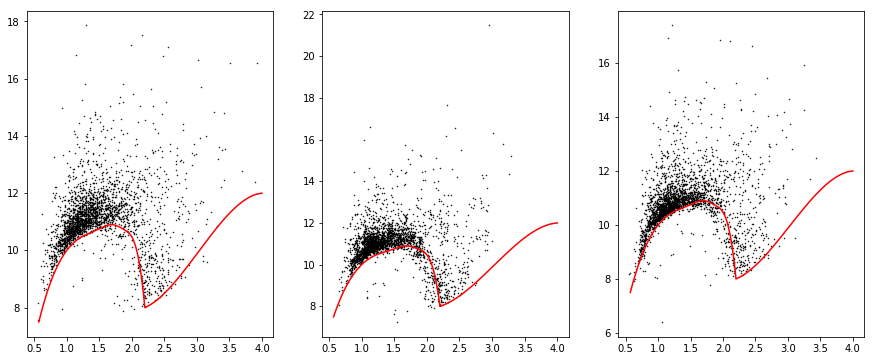

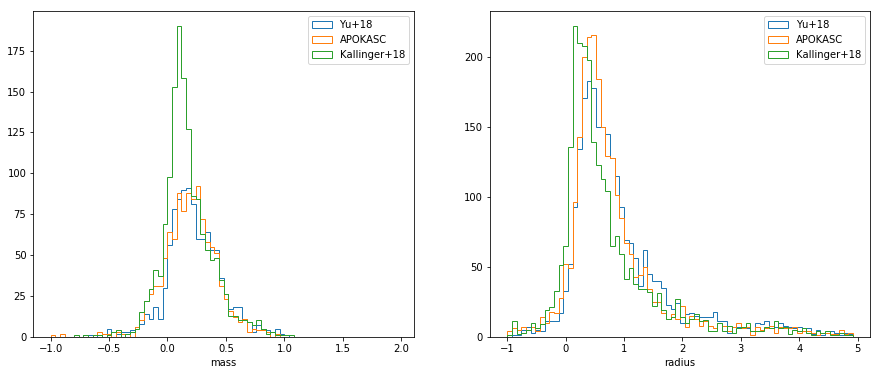

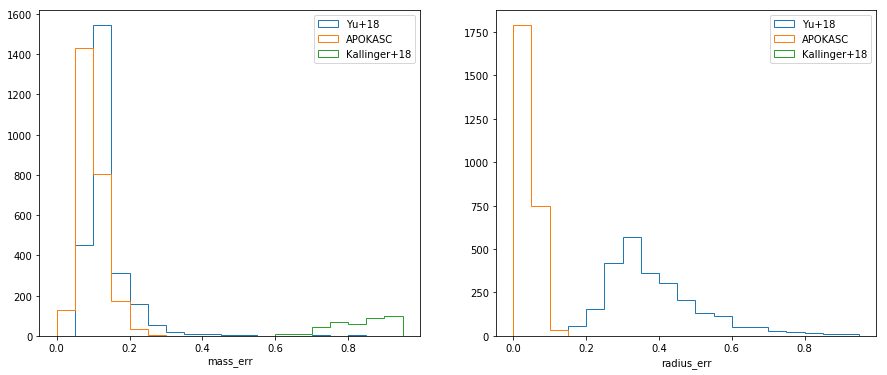

In [82]:
edges = np.load(rootpath+"sample/obs/mr_edge_samples.npy")
tcks, tp = np.load(rootpath+"sample/obs/mr_spline_tck.npy", allow_pickle=True)
import sys
sys.path.append(rootpath)
from lib.histdist import distance_to_edge


fig0, axes0 = plt.subplots(nrows=1,ncols=3,figsize=(15,6))
fig1, axes1 = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
fig2, axes2 = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
def myplot(i, mass, radius, mass_err, radius_err, label):

#     axes[0].plot(numax,dnu,"k.")    
#     axes[0].plot(edges[:,0], edges[:,1], "r")
    axes0[i].plot(mass,radius,"k.", ms=1)   
    axes0[i].plot(edges[:,0], edges[:,1], "r")
    dy, _, _ = distance_to_edge(mass, radius, edges[:,0], edges[:,1], tcks, tp, diagram="mr", distance="vertical")
    dx, _, _ = distance_to_edge(mass, radius, edges[:,0], edges[:,1], tcks, tp, diagram="mr", distance="horizontal")
    bins1, bins2 = np.arange(-1, 2, 0.04), np.arange(-1.0, 5, 0.08)
    axes1[0].hist(dx, bins=bins1, histtype="step", label=label)
    axes1[0].set_xlabel("mass")
    axes1[1].hist(dy, bins=bins2, histtype="step", label=label)
    axes1[1].set_xlabel("radius")
    
    bins1, bins2 = np.arange(0., 1, 0.05), np.arange(0, 1, 0.05)
    axes2[0].hist(mass_err, bins=bins1, histtype="step", label=label)
    axes2[0].set_xlabel("mass_err")
    axes2[1].hist(radius_err, bins=bins2, histtype="step", label=label)
    axes2[1].set_xlabel("radius_err")
    return

myplot(0, apk["ClcorM"], apk["ClcorR"], apk["e_ClcorM"], apk["e_ClcorR"], "Yu+18")
myplot(1, apk["M(cor)"], apk["R(cor)"], apk["e_M(cor)-ran"], apk["e_R(cor)-ran"], "APOKASC")

from fdnu import asfgrid
s=asfgrid.Seism(datadir=rootpath+"fdnu/")
fnumax = 1
mh = apk["FeH"] + np.log10(10.0**apk["AFe"]*0.694 + 0.306)
evstate = np.zeros(len(mh))+2
km, kr = s.get_mass_radius(evstate, mh, apk["Teff_2"], apk["dnu_2"], apk["fmax"], fill_value=None, isfeh=True) 
myplot(2, km, kr, km, kr, "Kallinger+18")

axes1[0].legend()
axes1[1].legend()
axes2[0].legend()
axes2[1].legend()
plt.show()
